In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
item_categorial=pd.read_csv('item_categories.csv')
items=pd.read_csv('items.csv')
sales_train=pd.read_csv('sales_train.csv')
sample_submission=pd.read_csv('sample_submission.csv')
shops=pd.read_csv('shops.csv')
test=pd.read_csv('test.csv')

In [3]:
sales1 = pd.merge(sales_train, items, on ='item_id',how ='left')
sales2 = pd.merge(sales1, item_categorial, on ='item_category_id',how ='left')
sales3 = pd.merge(sales2, shops, on ='shop_id',how ='left')
sales_train=sales3

In [4]:
sales_train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,item_category_name,shop_name
0,02.01.2013,0,59,22154,999.00,1.0,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray,"Ярославль ТЦ ""Альтаир"""
1,03.01.2013,0,25,2552,899.00,1.0,DEEP PURPLE The House Of Blue Light LP,58,Музыка - Винил,"Москва ТРК ""Атриум"""
2,05.01.2013,0,25,2552,899.00,-1.0,DEEP PURPLE The House Of Blue Light LP,58,Музыка - Винил,"Москва ТРК ""Атриум"""
3,06.01.2013,0,25,2554,1709.05,1.0,DEEP PURPLE Who Do You Think We Are LP,58,Музыка - Винил,"Москва ТРК ""Атриум"""
4,15.01.2013,0,25,2555,1099.00,1.0,DEEP PURPLE 30 Very Best Of 2CD (Фирм.),56,Музыка - CD фирменного производства,"Москва ТРК ""Атриум"""


In [5]:
sales_train=sales_train.drop(['item_price', 'item_category_id','date', 'item_name', 'item_category_name', 'shop_name'], axis=1)
sales_train = sales_train.groupby(['date_block_num','shop_id','item_id']).sum()
sales_train.reset_index(inplace=True)

In [6]:
items.head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [7]:
sample_submission.head()

,ID,item_cnt_month
0,0,0.5
1,1,0.5
2,2,0.5
3,3,0.5
4,4,0.5


In [8]:
shops.head()

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


In [9]:
test.head()

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


In [10]:
sales_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1609124 entries, 0 to 1609123
Data columns (total 4 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   date_block_num  1609124 non-null  int64  
 1   shop_id         1609124 non-null  int64  
 2   item_id         1609124 non-null  int64  
 3   item_cnt_day    1609124 non-null  float64
dtypes: float64(1), int64(3)
memory usage: 49.1 MB


In [11]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
sales_train[['item_cnt_day']] = scale.fit_transform(sales_train[['item_cnt_day']])
sales7 = sales_train.pivot_table(index=['shop_id','item_id'], columns='date_block_num', values='item_cnt_day', fill_value=0)

In [12]:
sales7

date_block_num         0         1    2    3    4    5         6    7    8   \
shop_id item_id                                                               
0       30       0.000000  3.321757  0.0  0.0  0.0  0.0  0.000000  0.0  0.0   
        31       0.000000  1.009586  0.0  0.0  0.0  0.0  0.000000  0.0  0.0   
        32       0.431544  0.893978  0.0  0.0  0.0  0.0  0.000000  0.0  0.0   
        33       0.084718  0.084718  0.0  0.0  0.0  0.0  0.000000  0.0  0.0   
        35      -0.146499  1.356412  0.0  0.0  0.0  0.0  0.000000  0.0  0.0   
...                   ...       ...  ...  ...  ...  ...       ...  ...  ...   
59      22154   -0.146499  0.000000  0.0  0.0  0.0  0.0  0.000000  0.0  0.0   
        22155    0.000000  0.000000  0.0  0.0  0.0  0.0 -0.146499  0.0  0.0   
        22162    0.000000  0.000000  0.0  0.0  0.0  0.0  0.000000  0.0  0.0   
        22164    0.000000  0.000000  0.0  0.0  0.0  0.0  0.000000  0.0  0.0   
        22167    0.000000  0.000000  0.0  0.0  0.0  0.0  0.000000  0.0  0.0   

date_block_num         9   ...   24        25        26        27        28  \
shop_id item_id            ...                                                
0       30       0.000000  ...  0.0  0.000000  0.000000  0.000000  0.000000   
        31       0.000000  ...  0.0  0.000000  0.000000  0.000000  0.000000   
        32       0.000000  ...  0.0  0.000000  0.000000  0.000000  0.000000   
        33       0.000000  ...  0.0  0.000000  0.000000  0.000000  0.000000   
        35       0.000000  ...  0.0  0.000000  0.000000  0.000000  0.000000   
...                   ...  ...  ...       ...       ...       ...       ...   
59      22154    0.000000  ...  0.0  0.000000  0.000000  0.000000  0.000000   
        22155    0.000000  ...  0.0  0.000000  0.000000  0.000000  0.000000   
        22162    0.000000  ...  0.0  0.778369  0.200326 -0.146499 -0.146499   
        22164    0.000000  ...  0.0 -0.030891 -0.146499 -0.030891  0.000000   
        22167   -0.146499  ...  0.0  0.000000  0.000000  0.000000  0.000000   

date_block_num    29        30        31   32   33  
shop_id item_id                                     
0       30       0.0  0.000000  0.000000  0.0  0.0  
        31       0.0  0.000000  0.000000  0.0  0.0  
        32       0.0  0.000000  0.000000  0.0  0.0  
        33       0.0  0.000000  0.000000  0.0  0.0  
        35       0.0  0.000000  0.000000  0.0  0.0  
...              ...       ...       ...  ...  ...  
59      22154    0.0  0.000000  0.000000  0.0  0.0  
        22155    0.0  0.000000  0.000000  0.0  0.0  
        22162    0.0  0.000000 -0.146499  0.0  0.0  
        22164    0.0 -0.146499  0.000000  0.0  0.0  
        22167    0.0  0.000000  0.000000  0.0  0.0  

[424124 rows x 34 columns]

In [13]:
sales7['mean'] = sales7.iloc[:, 2:].mean(axis=1)

In [14]:
x=sales7.drop('mean', axis=1)
y=sales7['mean']

In [15]:
y

shop_id  item_id
0        30         0.000000
         31         0.000000
         32         0.000000
         33         0.000000
         35         0.000000
                      ...   
59       22154      0.000000
         22155     -0.004578
         22162      0.016850
         22164     -0.011087
         22167     -0.010122
Name: mean, Length: 424124, dtype: float64

In [16]:
x

date_block_num         0         1    2    3    4    5         6    7    8   \
shop_id item_id                                                               
0       30       0.000000  3.321757  0.0  0.0  0.0  0.0  0.000000  0.0  0.0   
        31       0.000000  1.009586  0.0  0.0  0.0  0.0  0.000000  0.0  0.0   
        32       0.431544  0.893978  0.0  0.0  0.0  0.0  0.000000  0.0  0.0   
        33       0.084718  0.084718  0.0  0.0  0.0  0.0  0.000000  0.0  0.0   
        35      -0.146499  1.356412  0.0  0.0  0.0  0.0  0.000000  0.0  0.0   
...                   ...       ...  ...  ...  ...  ...       ...  ...  ...   
59      22154   -0.146499  0.000000  0.0  0.0  0.0  0.0  0.000000  0.0  0.0   
        22155    0.000000  0.000000  0.0  0.0  0.0  0.0 -0.146499  0.0  0.0   
        22162    0.000000  0.000000  0.0  0.0  0.0  0.0  0.000000  0.0  0.0   
        22164    0.000000  0.000000  0.0  0.0  0.0  0.0  0.000000  0.0  0.0   
        22167    0.000000  0.000000  0.0  0.0  0.0  0.0  0.000000  0.0  0.0   

date_block_num         9   ...   24        25        26        27        28  \
shop_id item_id            ...                                                
0       30       0.000000  ...  0.0  0.000000  0.000000  0.000000  0.000000   
        31       0.000000  ...  0.0  0.000000  0.000000  0.000000  0.000000   
        32       0.000000  ...  0.0  0.000000  0.000000  0.000000  0.000000   
        33       0.000000  ...  0.0  0.000000  0.000000  0.000000  0.000000   
        35       0.000000  ...  0.0  0.000000  0.000000  0.000000  0.000000   
...                   ...  ...  ...       ...       ...       ...       ...   
59      22154    0.000000  ...  0.0  0.000000  0.000000  0.000000  0.000000   
        22155    0.000000  ...  0.0  0.000000  0.000000  0.000000  0.000000   
        22162    0.000000  ...  0.0  0.778369  0.200326 -0.146499 -0.146499   
        22164    0.000000  ...  0.0 -0.030891 -0.146499 -0.030891  0.000000   
        22167   -0.146499  ...  0.0  0.000000  0.000000  0.000000  0.000000   

date_block_num    29        30        31   32   33  
shop_id item_id                                     
0       30       0.0  0.000000  0.000000  0.0  0.0  
        31       0.0  0.000000  0.000000  0.0  0.0  
        32       0.0  0.000000  0.000000  0.0  0.0  
        33       0.0  0.000000  0.000000  0.0  0.0  
        35       0.0  0.000000  0.000000  0.0  0.0  
...              ...       ...       ...  ...  ...  
59      22154    0.0  0.000000  0.000000  0.0  0.0  
        22155    0.0  0.000000  0.000000  0.0  0.0  
        22162    0.0  0.000000 -0.146499  0.0  0.0  
        22164    0.0 -0.146499  0.000000  0.0  0.0  
        22167    0.0  0.000000  0.000000  0.0  0.0  

[424124 rows x 34 columns]

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
reg = LinearRegression().fit(X_train, y_train)
y_pred =reg.predict(X_test)
y_pred_train = reg.predict(X_train)
 

In [19]:
mean_absolute_error(y_pred, y_test)

1.2687061203247117e-15

In [20]:
mean_absolute_error(y_pred_train, y_train)

1.3151937346348746e-15

In [21]:
mse = mean_squared_error(y_test, y_pred)
mse

1.661544331948536e-29

In [22]:
mean_squared_error(y_train, y_pred_train)

3.1239286981995445e-29

In [23]:
#cross_val_score(reg, X_test, y_test, cv=5)

In [24]:
from sklearn.model_selection import cross_validate
cross_validate(reg, X_train, y_train, cv=5)

{'fit_time': array([0.66931438, 0.62518167, 0.63409567, 0.61808443, 0.59799838]),
 'score_time': array([0.0297792 , 0.01523328, 0.01300359, 0.01399994, 0.02853394]),
 'test_score': array([1., 1., 1., 1., 1.])}

In [25]:
import xgboost as xgb
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostRegressor 
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
model_1 = xgb.XGBRegressor()
model_1.fit(X_train, y_train, eval_metric = 'rmse')
preds = model_1.predict(X_test)
preds_t = model_1.predict(X_train)

In [26]:
mean_squared_error(y_test, preds)

0.002119072836601789

In [27]:
mean_squared_error(y_train, preds_t)

1.6410421858734757e-05

In [28]:
mean_absolute_error(preds, y_test)

0.00251441984422957

In [30]:
mean_absolute_error(preds_t, y_train)

0.0016757620476919256

In [31]:
r2_score(preds_t, y_train)

0.9997531728574389

In [32]:
r2_score(preds, y_test)

0.8002804058521273

In [33]:
regr  = AdaBoostRegressor(n_estimators=10, random_state=0)
regr.fit(X_train, y_train)

AdaBoostRegressor(n_estimators=10, random_state=0)

In [34]:
pred_regr=regr.predict(X_test)
pred_regr_t=regr.predict(X_train)

In [35]:
mean_squared_error(y_test, pred_regr)

0.0063145116340442104

In [36]:
mean_squared_error(y_train, pred_regr_t)

0.004831248463947037

In [37]:
mean_absolute_error(pred_regr, y_test)

0.03862941558006794

In [38]:
mean_absolute_error(pred_regr_t, y_train)

0.03870550737874496

In [39]:
r2_score(pred_regr_t, y_train)

0.9197345715195022

In [40]:
r2_score(pred_regr,y_test)

0.17417840097003323

In [41]:
from sklearn.linear_model import Ridge, Lasso
model_0= Lasso(alpha=10).fit(X_train, y_train)
y_pred = model_0.predict(X_test)
y_pred_train = model_0.predict(X_train)
print("Качество на валидации: %.3f" % mean_squared_error(y_test, y_pred))
print("Качество на обучении: %.3f" % mean_squared_error(y_train, y_pred_train))

Качество на валидации: 0.015
Качество на обучении: 0.067


In [42]:
model_1= Ridge(alpha=10).fit(X_train, y_train)
y_pred = model_0.predict(X_test)
y_pred_train = model_0.predict(X_train)
print("Качество на валидации: %.3f" % mean_squared_error(y_test, y_pred))
print("Качество на обучении: %.3f" % mean_squared_error(y_train, y_pred_train))

Качество на валидации: 0.015
Качество на обучении: 0.067


In [43]:
from sklearn.linear_model import SGDRegressor
import numpy as np
sgd_regressor = SGDRegressor(learning_rate='constant', eta0=0.009, fit_intercept=True, random_state=42)
sgd_regressor = sgd_regressor.partial_fit(X_train, y_train)

In [44]:
#Я не понял как тут верно сделать градиентный спуск
#weight_evolution, mse_evolution = [], [] # изменения весов и ошибка на валидации
#w_current, epsilon = np.random.random(34), 0.0001
#for step in list(range(800)):
#    sgd_regressor = sgd_regressor.partial_fit(X_train, y_train)
#    weight_evolution.append(distance.euclidean(w_current, sgd_regressor.coef_))
#    if weight_evolution[-1]<epsilon:
#        print("Итарации остановлены на шаге %d" % step); break
#    mse_evolution.append(mean_squared_error(y_test, sgd_regressor.predict(X_test)))
#    w_current = sgd_regressor.coef_.copy()
#plt.plot(range(step), mse_evolution)

In [45]:
y_pred=sgd_regressor.predict(X_test)
y_pred_train=sgd_regressor.predict(X_train)

In [46]:
mean_absolute_error(y_pred, y_test)

15593588464.163038

In [47]:
mean_squared_error(y_test, y_pred)

6.425588097592127e+21

In [48]:
mean_absolute_error(y_pred_train, y_train)

15991755669.341856

In [49]:
mean_squared_error(y_train, y_pred_train)

9.48875010703782e+21

In [51]:
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std
from sklearn.model_selection import RepeatedKFold
from lightgbm import LGBMRegressor
model = LGBMRegressor()
# evaluate the model
#cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
#n_scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
# report performance
#print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

In [ ]:
model.fit(X_train,y_train) 
y_pred=model.predict(X_test)
y_pred_train=model.predict(X_train)

In [ ]:
mean_absolute_error(y_pred, y_test)

In [ ]:
mean_squared_error(y_test, y_pred)

In [ ]:
mean_absolute_error(y_pred_train, y_train)

In [ ]:
mean_squared_error(y_train, y_pred_train)

In [ ]:
r2_score(y_pred_train, y_train)

In [ ]:
r2_score(y_pred, y_test)

In [ ]:
 
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from hyperopt import hp, fmin, tpe, Trials, STATUS_OK

In [ ]:
X_test.shape

In [ ]:
from keras import models
from keras import layers 
model = models.Sequential()  
model.add(layers.Dense(64, activation='relu',  input_shape=(X_test.shape[1],)))  
model.add(layers.Dense(64, activation='relu'))  
model.add(layers.Dense(1))  
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])   

In [ ]:
model.fit(X_train, y_train,  epochs=1, batch_size=1, verbose=0)  
results = model.evaluate(X_test, y_test, verbose=0)   
 

In [ ]:
results

In [ ]:
predictions=model.predict(X_test)

In [ ]:
predictions

In [ ]:
mean_absolute_error(predictions, y_test)

In [ ]:
mean_squared_error(y_test, predictions)

In [57]:
r2_score(y_test, predictions)

0.9938143455885836

In [58]:
 #validation_data=(x_val, y_val)
model_2 = models.Sequential()  
model_2.add(layers.Dense(64, activation='relu',  input_shape=(X_test.shape[1],)))  
model_2.add(layers.Dense(64, activation='relu'))  
model_2.add(layers.Dense(1))  
model_2.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])   
history=model.fit(X_train, y_train,  epochs=4, batch_size=1, verbose=0,validation_data=(X_test, y_test))  
#results = model.evaluate(X_test, y_test, verbose=0)   
 

In [59]:
history_dict=history.history
history_dict

{'loss': [0.00016141918604262173,
  0.0001776285353116691,
  9.334632341051474e-05,
  0.00013017065066378564],
 'mae': [0.0010169818997383118,
  0.0009301104582846165,
  0.0008812214364297688,
  0.0008853581384755671],
 'val_loss': [4.572312536765821e-05,
  4.738376082968898e-05,
  1.7355699810650549e-06,
  4.539146539173089e-05],
 'val_mae': [0.001062452676706016,
  0.0005555054522119462,
  0.0003846444305963814,
  0.001278139534406364]}

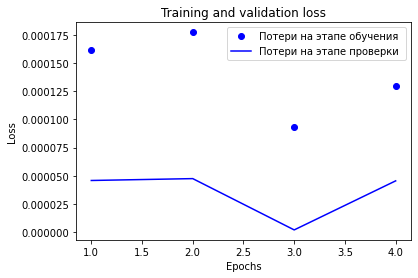

In [60]:
import matplotlib.pyplot as plt
history_dict=history.history
loss_values=history_dict['loss']
vall_loss_values=history_dict['val_loss']
mae=history_dict['mae']
epochs=range(1,len(mae)+1)
plt.plot(epochs,loss_values,'bo',label='Потери на этапе обучения')
plt.plot(epochs,vall_loss_values,'b',label='Потери на этапе проверки ')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()